## End to End Facility Booking System Powerapps ⏰
---

## 1. Problem


The company would like to replace the current facility booking system with another platform in MS Powerapp. 

## 2. Prototype

* The solution will be developed in Mitsui environment

>https://make.powerapps.com/e/Default-ffb76b20-b480-4230-8bf5-23ec920b1ce3/canvas/?action=edit&app-id=%2Fproviders%2FMicrosoft.PowerApps%2Fapps%2Fe14a3b3a-bda4-4b97-9f89-a99bb3b28225 

* A github account is created to allow co-authoring with multiple developers. Co-Authoring is an experimental feature just released by PowerApps team. 

> https://docs.microsoft.com/en-us/powerapps/maker/canvas-apps/git-version-control


## 3. Evaluation

For the project to be a success, it must fulfil the following:

Priorities:
1. Conference room booking.
2. Golf course and others (Golf kit, Zoo, Bungalow, etc.) booking
3. Driver booking.



## Outstanding Tasks


* Create API for SMS (commzgate / twilio) 
* Create edit screen for meeting
* Consider email address for external emails.

* Think of a way to filter gallery upon icon selection
* Consider add "All" with Resource category

* Add calendar & time selection screen
* Admin, User access

* Create rooms / mailbox resource to get list of calendars. https://docs.microsoft.com/en-us/microsoft-365/admin/manage/room-and-equipment-mailboxes?view=o365-worldwide
* https://powerusers.microsoft.com/t5/Building-Power-Apps/How-to-get-Resource-room-s-Calendar-ID/m-p/327815


## Completed

* Add facility selection screen ✔
* Add SPO list for Facilities ✔
* Add date selection screen ✔
* Add Create Meeting screen base on user selection ✔

# Resource


* Create teams meeting using Powerapps
 https://www.youtube.com/watch?v=hPRzHbMzoI0

* Find out how to edit here
https://www.youtube.com/watch?v=8MzqVLcaioc

* Create Sharepoint List with existing list https://www.sharepointdiary.com/2017/08/sharepoint-online-save-list-as-template-missing.html

* Markdown Guide https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=Lhfnlq1Surtk

* PowerApps filter gallery by dropdown https://www.youtube.com/watch?v=kLGglidmPxg&t=555s

* Power Apps Reset a Gallery and varRecord instead of Selected https://www.youtube.com/watch?v=691pRyRHWBU
* Power Apps Dropdown Control - Cascading, Filtering, Allow Empty, Outputs, and more https://www.youtube.com/watch?v=SKMwayf_cuM&t=1158s

# Setting Up SPO

* Create SPO list with the following

# Development Logs

---

## 19-Jan-2022


* Created new screen called scrMeetingInput
* Need to tweak the screen to match outlook
* When user select a facility, this value needs to parse to scrMeetingInput so user do not have to key in again
* After input all values, scrMeetingInput values needs to clear








## 20-Jan-2022


* From template desk booking, created a screen for all bookings is made. This is done removing the limation of gallery to specific user.


Original

```
SortByColumns(
    Filter(
        'Desks Reservations List',
        'Reserved By'.Email = currentUser.Email && 'Check Out From Number' >= Value(
            Text(
                Today(),
                "yyyymmddhmm"
            )
        )
    ),
    "CheckOutFromNumber",
    Ascending
)
```



Modified

```
SortByColumns(Filter('Desks Reservations List', DeskText = Dropdown1.Selected.Name, 'Check Out From Number' >= Value(
            Text(
                Today(),
                "yyyymmddhmm"
            )
        )
    ),
    "CheckOutFromNumber",
    Ascending
)
```



Excellent, by removing the limit of gallery = currentUser, the gallery now displays all boookings related to the facility. 

In the All appointment screen, the button to edit booking has been modified. Only the current user is able to modify their current booking.

The meeting organizer cannot add himself into the meeting invite.

## 24-Jan-2022

* Previous was 1 each ( Hour / Min / Day). Combine to 1 dropdown timing with interval of 15 minutes instead.

```
With(
    {Interval: 15},
    ForAll(
        Sequence(60 * 24 / Interval),
        Time(
            0,
            Interval * (Value - 1),
            0
        )
    )
)
```

* Create facility list base on excel FacilityCategory.Xlsx

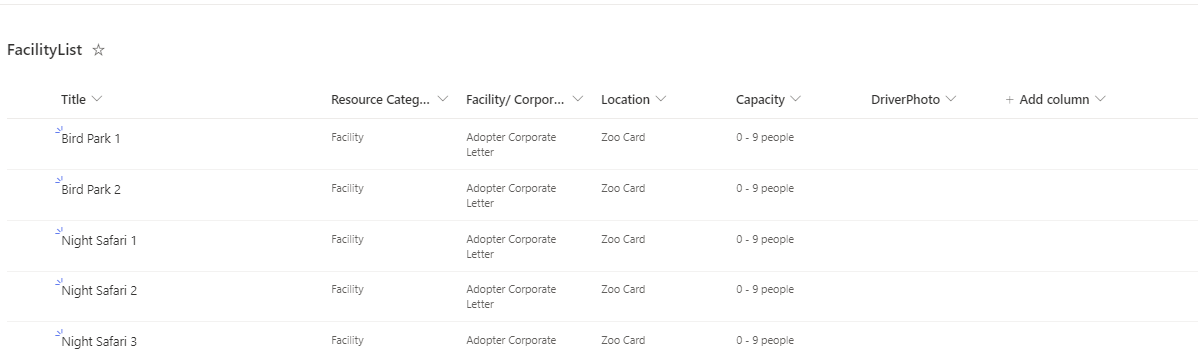

* Remove duplicate value in Select one or multiple resource.
* galFacilitySelection not working as expected.

















































## 27-Jan-2022

* Added Resource Category to look at Distinct. Not sure if able to default selection to all instead. 
* Tried to clear collect and add All to list of distinct Facility list. But that would mean dropdown selection would reset each time. Need to rethink if user press back, add an option to prevent user to append same item to collection ```[SelectedFacility]``` instead

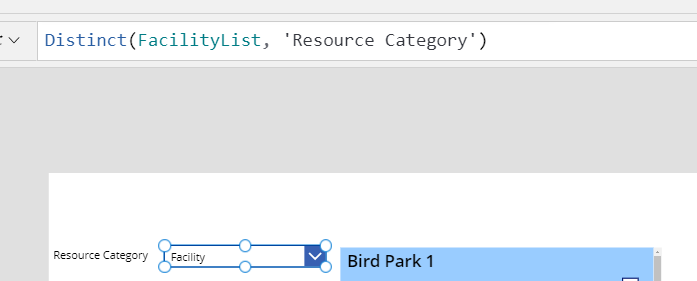

* Added warning to button that prevents user to proceed without making any selection

```
If(
    IsEmpty(SelectedFacility),
    Notify(
        "Please select a facility to continue",
        NotificationType.Warning
    ),
    Navigate(
        scrDateSelection,
        ScreenTransition.Fade
    )
)
```

https://powerusers.microsoft.com/t5/Building-Power-Apps/Add-Other-option-to-cascading-drop-down-list/m-p/896063#M284365

## 03-Feb-2022

* Added Date Selection Screen using component

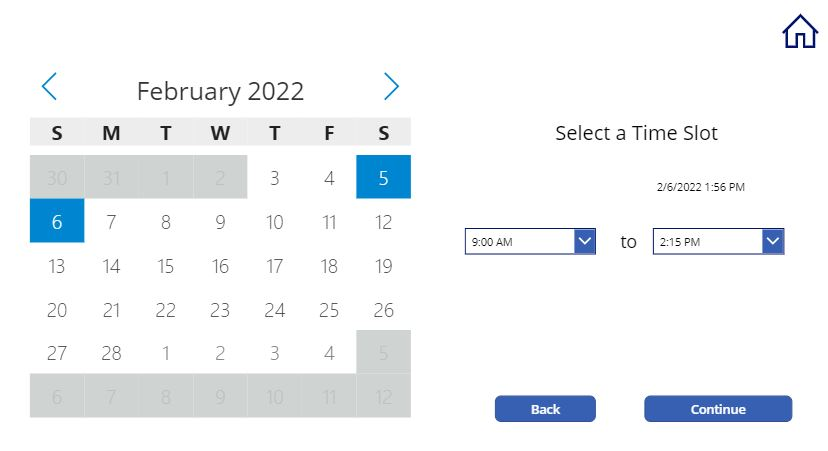

* Modified Create teams meeting button

Original

```
MicrosoftTeams.CreateTeamsMeeting(
    /* users Calendar, do not change row 3 of code*/ 
    LookUp(Office365Outlook.CalendarGetTables().value, DisplayName = "Calendar"). Name,
    /* Subject of the meeting, to create variable */
    inp_Subject_2.Text, 
    {content: inp_Body_1.Text, contentType: "html"},
    "Singapore Standard Time",
    /* Start of meeting time*/
    {dateTime: DateTimeValue(dd_StartTime_1.SelectedText.Value)},
    
    /* End meeting time*/
    {dateTime: DateTimeValue(dd_EndTime_1.SelectedText.Value)},

    true, "teamsForBusiness",
    
    // everything below is optional
    {
    // * Attendees
    // requiredAttendees:Concat(cb_RequiredUser.SelectedItems.Mail, ";"),   
        requiredAttendees: " ",   
    // Optional Attendees
    optionalAttendees:Concat(cb_OptionalUser_1.SelectedItems.Mail, ";"),   
    // location
    location: {displayName: inpt_Location_1.Text},
    // Importance
    importance: dd_Importance_1.SelectedText.Value,
    // isALlDay - if all day is selected, starttime = 00:00, end time = 00:00 
    isAllDay: tgAllDay_1.Value,
    // Status to use during meeting: Value: 
    showAs: "Busy",
    // Confirmation receipt
    responseRequested: true
    }
)
```



* Modified

```
MicrosoftTeams.CreateTeamsMeeting(
    /* users Calendar, do not change row 3 of code*/ 
    LookUp(Office365Outlook.CalendarGetTables().value, DisplayName = "Calendar"). Name,
    /* Subject of the meeting, to create variable */
    inp_Subject.Text, 
    {content: inp_Body.Text, contentType: "html"},
    "Singapore Standard Time",
    /* Start of meeting date & time*/
    {dateTime: Text(startTime,DateTimeFormat.ShortDate) & " " & Text(startTime,DateTimeFormat.ShortTime)},
    
    /* End meeting date & time*/
    {dateTime: Text(endTime,DateTimeFormat.ShortDate) & " " & Text(endTime,DateTimeFormat.ShortTime)},

    true, "teamsForBusiness",
    
    // everything below is optional
    {
    // * Attendees
    // requiredAttendees:Concat(cb_RequiredUser.SelectedItems.Mail, ";"),   
        requiredAttendees: " ",   
    // Optional Attendees
    optionalAttendees:Concat(cb_OptionalUser.SelectedItems.Mail, ";"),   
    // location
    location: {displayName: inpt_Location.Text},
    // Importance
    importance: dd_Importance.SelectedText.Value,
    // isALlDay - if all day is selected, starttime = 00:00, end time = 00:00 
    isAllDay: tgAllDay.Value,
    // Status to use during meeting: Value: 
    showAs: "Busy",
    // Confirmation receipt
    responseRequested: true
    }
)
```